<a href="https://colab.research.google.com/github/ayanoglu/Sensor-Network-Prediction-Models/blob/main-functionsgeneralized/ColdChainTransportation_Time_Series_Prediction_For_Sensor_Networks_Prediction_based_on_number_of_sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES AND DATASET**

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error

uploaded = files.upload()

Saving S2.csv to S2 (1).csv
Saving S3.csv to S3 (1).csv
Saving S4.csv to S4 (1).csv
Saving S5.csv to S5 (1).csv
Saving S6.csv to S6 (1).csv


**READ IN THE CSV FILE, LOCATE COLUMNS AND SAVE AS FEATURES**

**PLOT "Front Top", "Mid Top" AND "Rear Top"**

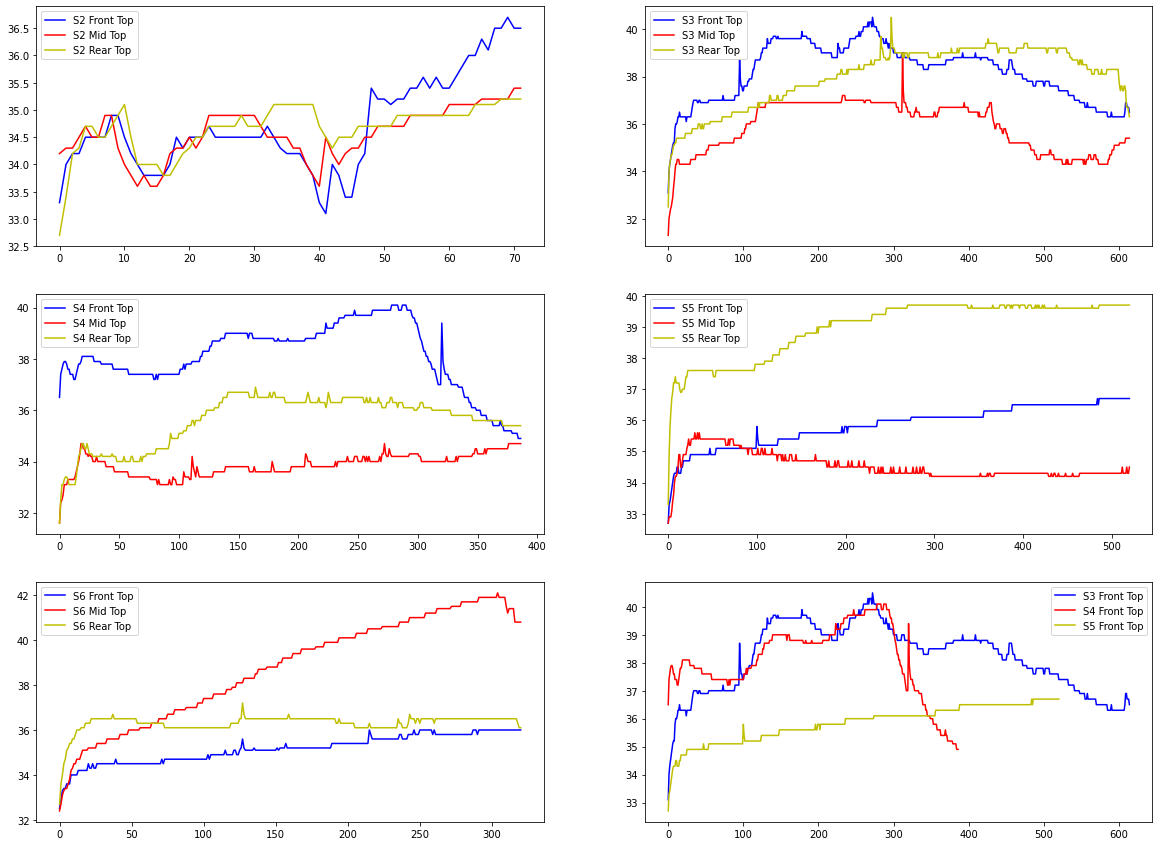

In [46]:
import io
S2 = pd.read_csv(io.BytesIO(uploaded['S2.csv']))
S3 = pd.read_csv(io.BytesIO(uploaded['S3.csv']))
S4 = pd.read_csv(io.BytesIO(uploaded['S4.csv']))
S5 = pd.read_csv(io.BytesIO(uploaded['S5.csv']))
S6 = pd.read_csv(io.BytesIO(uploaded['S6.csv']))

def csvtocolumns(dataset):
  FT = dataset.iloc[:,1]
  FM = dataset.iloc[:,2]
  FB = dataset.iloc[:,3]
  MT = dataset.iloc[:,4]
  MM = dataset.iloc[:,5]
  MB = dataset.iloc[:,6]
  RT = dataset.iloc[:,7]
  RM = dataset.iloc[:,8]
  RB = dataset.iloc[:,9]
  return FT, FM, FB, MT, MM, MB, RT, RM, RB

S2FT, S2FM, S2FB, S2MT, S2MM, S2MB, S2RT, S2RM, S2RB = csvtocolumns(S2)
S3FT, S3FM, S3FB, S3MT, S3MM, S3MB, S3RT, S3RM, S3RB = csvtocolumns(S3)
S4FT, S4FM, S4FB, S4MT, S4MM, S4MB, S4RT, S4RM, S4RB = csvtocolumns(S4)
S5FT, S5FM, S5FB, S5MT, S5MM, S5MB, S5RT, S5RM, S5RB = csvtocolumns(S5)
S6FT, S6FM, S6FB, S6MT, S6MM, S6MB, S6RT, S6RM, S6RB = csvtocolumns(S6)

#print(f'Length of S2 {len(S2FT)} , {len(S2FM)} , {len(S2FB)} , {len(S2MT)} , {len(S2MM)} , {len(S2MB)} , {len(S2RT)} , {len(S2RM)} , {len(S2RB)}')
#print(f'Length of S2 {len(S3FT)} , {len(S3FM)} , {len(S3FB)} , {len(S3MT)} , {len(S3MM)} , {len(S3MB)} , {len(S3RT)} , {len(S3RM)} , {len(S3RB)}')
#print(f'Length of S2 {len(S4FT)} , {len(S4FM)} , {len(S4FB)} , {len(S4MT)} , {len(S4MM)} , {len(S4MB)} , {len(S4RT)} , {len(S4RM)} , {len(S4RB)}')
#print(f'Length of S2 {len(S5FT)} , {len(S5FM)} , {len(S5FB)} , {len(S5MT)} , {len(S5MM)} , {len(S5MB)} , {len(S5RT)} , {len(S5RM)} , {len(S5RB)}')
#print(f'Length of S2 {len(S6FT)} , {len(S6FM)} , {len(S6FB)} , {len(S6MT)} , {len(S6MM)} , {len(S6MB)} , {len(S6RT)} , {len(S6RM)} , {len(S6RB)}')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

ax[0,0].plot(S2FT, "b", label='S2 Front Top')
ax[0,0].plot(S2MT, "r", label='S2 Mid Top')
ax[0,0].plot(S2RT, "y", label='S2 Rear Top')
ax[0,0].legend()

ax[0,1].plot(S3FT, "b", label='S3 Front Top')
ax[0,1].plot(S3MT, "r", label='S3 Mid Top')
ax[0,1].plot(S3RT, "y", label='S3 Rear Top')
ax[0,1].legend()

ax[1,0].plot(S4FT, "b", label='S4 Front Top')
ax[1,0].plot(S4MT, "r", label='S4 Mid Top')
ax[1,0].plot(S4RT, "y", label='S4 Rear Top')
ax[1,0].legend()

ax[1,1].plot(S5FT, "b", label='S5 Front Top')
ax[1,1].plot(S5MT, "r", label='S5 Mid Top')
ax[1,1].plot(S5RT, "y", label='S5 Rear Top')
ax[1,1].legend()

ax[2,0].plot(S6FT, "b", label='S6 Front Top')
ax[2,0].plot(S6MT, "r", label='S6 Mid Top')
ax[2,0].plot(S6RT, "y", label='S6 Rear Top')
ax[2,0].legend()

ax[2,1].plot(S3FT, "b", label='S3 Front Top')
ax[2,1].plot(S4FT, "r", label='S4 Front Top')
ax[2,1].plot(S5FT, "y", label='S5 Front Top')
ax[2,1].legend()

plt.show()

In [47]:
print(f'Any Nan values in S2? {(S2.isnull().values.any())}')
print(f'Any Nan values in S3? {(S3.isnull().values.any())}')
print(f'Any Nan values in S4? {(S4.isnull().values.any())}')
print(f'Any Nan values in S5? {(S5.isnull().values.any())}')
print(f'Any Nan values in S6? {(S6.isnull().values.any())}')

S6FT, S6FM, S6FB, S6MT, S6MM, S6MB, S6RT, S6RM, S6RB

print(f'Any Nan values in S6FT? {(S6FT.isnull().values.any())}')
print(f'Any Nan values in S6FM? {(S6FM.isnull().values.any())}')
print(f'Any Nan values in S6FB? {(S6FB.isnull().values.any())}')
print(f'Any Nan values in S6MT? {(S6MT.isnull().values.any())}')
print(f'Any Nan values in S6MM? {(S6MM.isnull().values.any())}')
print(f'Any Nan values in S6MB? {(S6MB.isnull().values.any())}')
print(f'Any Nan values in S6RT? {(S6RT.isnull().values.any())}')
print(f'Any Nan values in S6RM? {(S6RM.isnull().values.any())}')
print(f'Any Nan values in S6RB? {(S6RB.isnull().values.any())}')

Any Nan values in S2? False
Any Nan values in S3? False
Any Nan values in S4? False
Any Nan values in S5? False
Any Nan values in S6? True
Any Nan values in S6FT? False
Any Nan values in S6FM? False
Any Nan values in S6FB? True
Any Nan values in S6MT? False
Any Nan values in S6MM? False
Any Nan values in S6MB? False
Any Nan values in S6RT? False
Any Nan values in S6RM? False
Any Nan values in S6RB? False


**DEFINE THE SEQUENCE CREATING FUNCTION, CONVERT DATASET DATA TO ARRAY AND CREATE SEQUENCE**

In [48]:
def create_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix-4] # so that we can get the 3rd data of 0-7 sequence 
		# seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] 
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

S2FTA = pd.DataFrame.to_numpy(S2FT)
S2MTA = pd.DataFrame.to_numpy(S2MT)
S2RTA = pd.DataFrame.to_numpy(S2RT)
S2FMA = pd.DataFrame.to_numpy(S2FM)
S2MMA = pd.DataFrame.to_numpy(S2MM)
S2RMA = pd.DataFrame.to_numpy(S2RM)
S2FBA = pd.DataFrame.to_numpy(S2FB)
S2MBA = pd.DataFrame.to_numpy(S2MB)
S2RBA = pd.DataFrame.to_numpy(S2RB)

S3FTA = pd.DataFrame.to_numpy(S3FT)
S3MTA = pd.DataFrame.to_numpy(S3MT)
S3RTA = pd.DataFrame.to_numpy(S3RT)
S3FMA = pd.DataFrame.to_numpy(S3FM)
S3MMA = pd.DataFrame.to_numpy(S3MM)
S3RMA = pd.DataFrame.to_numpy(S3RM)
S3FBA = pd.DataFrame.to_numpy(S3FB)
S3MBA = pd.DataFrame.to_numpy(S3MB)
S3RBA = pd.DataFrame.to_numpy(S3RB)

S4FTA = pd.DataFrame.to_numpy(S4FT)
S4MTA = pd.DataFrame.to_numpy(S4MT)
S4RTA = pd.DataFrame.to_numpy(S4RT)
S4FMA = pd.DataFrame.to_numpy(S4FM)
S4MMA = pd.DataFrame.to_numpy(S4MM)
S4RMA = pd.DataFrame.to_numpy(S4RM)
S4FBA = pd.DataFrame.to_numpy(S4FB)
S4MBA = pd.DataFrame.to_numpy(S4MB)
S4RBA = pd.DataFrame.to_numpy(S4RB)

S5FTA = pd.DataFrame.to_numpy(S5FT)
S5MTA = pd.DataFrame.to_numpy(S5MT)
S5RTA = pd.DataFrame.to_numpy(S5RT)
S5FMA = pd.DataFrame.to_numpy(S5FM)
S5MMA = pd.DataFrame.to_numpy(S5MM)
S5RMA = pd.DataFrame.to_numpy(S5RM)
S5FBA = pd.DataFrame.to_numpy(S5FB)
S5MBA = pd.DataFrame.to_numpy(S5MB)
S5RBA = pd.DataFrame.to_numpy(S5RB)

S6FTA = pd.DataFrame.to_numpy(S6FT)
S6MTA = pd.DataFrame.to_numpy(S6MT)
S6RTA = pd.DataFrame.to_numpy(S6RT)
S6FMA = pd.DataFrame.to_numpy(S6FM)
S6MMA = pd.DataFrame.to_numpy(S6MM)
S6RMA = pd.DataFrame.to_numpy(S6RM)
S6FBA = pd.DataFrame.to_numpy(S6FB)
S6MBA = pd.DataFrame.to_numpy(S6MB)
S6RBA = pd.DataFrame.to_numpy(S6RB)

n_steps = 7

S2FTX, S2FTY = create_sequence(S2FTA, n_steps)
S2MTX, S2MTY = create_sequence(S2MTA, n_steps)
S2RTX, S2RTY = create_sequence(S2RTA, n_steps)
S2FMX, S2FMY = create_sequence(S2FMA, n_steps)
S2MMX, S2MMY = create_sequence(S2MMA, n_steps)
S2RMX, S2RMY = create_sequence(S2RMA, n_steps)
S2FBX, S2FBY = create_sequence(S2FBA, n_steps)
S2MBX, S2MBY = create_sequence(S2MBA, n_steps)
S2RBX, S2RBY = create_sequence(S2RBA, n_steps)

S3FTX, S3FTY = create_sequence(S3FTA, n_steps)
S3MTX, S3MTY = create_sequence(S3MTA, n_steps)
S3RTX, S3RTY = create_sequence(S3RTA, n_steps)
S3FMX, S3FMY = create_sequence(S3FMA, n_steps)
S3MMX, S3MMY = create_sequence(S3MMA, n_steps)
S3RMX, S3RMY = create_sequence(S3RMA, n_steps)
S3FBX, S3FBY = create_sequence(S3FBA, n_steps)
S3MBX, S3MBY = create_sequence(S3MBA, n_steps)
S3RBX, S3RBY = create_sequence(S3RBA, n_steps)

S4FTX, S4FTY = create_sequence(S4FTA, n_steps)
S4MTX, S4MTY = create_sequence(S4MTA, n_steps)
S4RTX, S4RTY = create_sequence(S4RTA, n_steps)
S4FMX, S4FMY = create_sequence(S4FMA, n_steps)
S4MMX, S4MMY = create_sequence(S4MMA, n_steps)
S4RMX, S4RMY = create_sequence(S4RMA, n_steps)
S4FBX, S4FBY = create_sequence(S4FBA, n_steps)
S4MBX, S4MBY = create_sequence(S4MBA, n_steps)
S4RBX, S4RBY = create_sequence(S4RBA, n_steps)

S5FTX, S5FTY = create_sequence(S5FTA, n_steps)
S5MTX, S5MTY = create_sequence(S5MTA, n_steps)
S5RTX, S5RTY = create_sequence(S5RTA, n_steps)
S5FMX, S5FMY = create_sequence(S5FMA, n_steps)
S5MMX, S5MMY = create_sequence(S5MMA, n_steps)
S5RMX, S5RMY = create_sequence(S5RMA, n_steps)
S5FBX, S5FBY = create_sequence(S5FBA, n_steps)
S5MBX, S5MBY = create_sequence(S5MBA, n_steps)
S5RBX, S5RBY = create_sequence(S5RBA, n_steps)

S6FTX, S6FTY = create_sequence(S6FTA, n_steps)
S6MTX, S6MTY = create_sequence(S6MTA, n_steps)
S6RTX, S6RTY = create_sequence(S6RTA, n_steps)
S6FMX, S6FMY = create_sequence(S6FMA, n_steps)
S6MMX, S6MMY = create_sequence(S6MMA, n_steps)
S6RMX, S6RMY = create_sequence(S6RMA, n_steps)
S6FBX, S6FBY = create_sequence(S6FBA, n_steps)
S6MBX, S6MBY = create_sequence(S6MBA, n_steps)
S6RBX, S6RBY = create_sequence(S6RBA, n_steps)

len(S2FTX)
len(S3FTX)

X_FT = np.concatenate((S2FTX, S3FTX, S4FTX, S5FTX, S6FTX), axis=0)
y_FT = np.concatenate((S2FTY, S3FTY, S4FTY, S5FTY, S6FTY), axis=0)
X_FM = np.concatenate((S2FMX, S3FMX, S4FMX, S5FMX, S6FMX), axis=0)
y_FM = np.concatenate((S2FMY, S3FMY, S4FMY, S5FMY, S6FMY), axis=0)
X_FB = np.concatenate((S2FBX, S3FBX, S4FBX, S5FBX, S6FBX), axis=0)
y_FB = np.concatenate((S2FBY, S3FBY, S4FBY, S5FBY, S6FBY), axis=0)

X_MT = np.concatenate((S2MTX, S3MTX, S4MTX, S5MTX, S6MTX), axis=0)
y_MT = np.concatenate((S2MTY, S3MTY, S4MTY, S5MTY, S6MTY), axis=0)
X_MM = np.concatenate((S2MMX, S3MMX, S4MMX, S5MMX, S6MMX), axis=0)
y_MM = np.concatenate((S2MMY, S3MMY, S4MMY, S5MMY, S6MMY), axis=0)
X_MB = np.concatenate((S2MBX, S3MBX, S4MBX, S5MBX, S6MBX), axis=0)
y_MB = np.concatenate((S2MBY, S3MBY, S4MBY, S5MBY, S6MBY), axis=0)

X_RT = np.concatenate((S2RTX, S3RTX, S4RTX, S5RTX, S6RTX), axis=0)
y_RT = np.concatenate((S2RTY, S3RTY, S4RTY, S5RTY, S6RTY), axis=0)
X_RM = np.concatenate((S2RMX, S3RMX, S4RMX, S5RMX, S6RMX), axis=0)
y_RM = np.concatenate((S2RMY, S3RMY, S4RMY, S5RMY, S6RMY), axis=0)
X_RB = np.concatenate((S2RBX, S3RBX, S4RBX, S5RBX, S6RBX), axis=0)
y_RB = np.concatenate((S2RBY, S3RBY, S4RBY, S5RBY, S6RBY), axis=0)

len(X_FT)

#plt.figure(figsize=(12, 10))
#plt.plot(y_FT, "b", label="y_FT")
#plt.plot(y_MT, "r", label="y_MT")
#plt.plot(y_RT, "y", label="y_RT")
#plt.legend()
#plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(y=y_FT, name="y_FT", line_shape='linear'))
fig.add_trace(go.Scatter(y=y_MT, name="y_MT", line_shape='linear'))
fig.add_trace(go.Scatter(y=y_RT, name="y_RT", line_shape='linear'))
fig.show()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(y=y_FM, name="y_FM", line_shape='linear'))
fig1.add_trace(go.Scatter(y=y_MM, name="y_MM", line_shape='linear'))
fig1.add_trace(go.Scatter(y=y_RM, name="y_RM", line_shape='linear'))
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(y=y_FB, name="y_FB", line_shape='linear'))
fig2.add_trace(go.Scatter(y=y_MB, name="y_MB", line_shape='linear'))
fig2.add_trace(go.Scatter(y=y_RB, name="y_RB", line_shape='linear'))
fig2.show()

In [5]:
X_FT[10:20]

array([[34.5, 34.2, 34. , 33.8, 33.8, 33.8, 33.8],
       [34.2, 34. , 33.8, 33.8, 33.8, 33.8, 34. ],
       [34. , 33.8, 33.8, 33.8, 33.8, 34. , 34.5],
       [33.8, 33.8, 33.8, 33.8, 34. , 34.5, 34.3],
       [33.8, 33.8, 33.8, 34. , 34.5, 34.3, 34.5],
       [33.8, 33.8, 34. , 34.5, 34.3, 34.5, 34.5],
       [33.8, 34. , 34.5, 34.3, 34.5, 34.5, 34.5],
       [34. , 34.5, 34.3, 34.5, 34.5, 34.5, 34.7],
       [34.5, 34.3, 34.5, 34.5, 34.5, 34.7, 34.5],
       [34.3, 34.5, 34.5, 34.5, 34.7, 34.5, 34.5]])

In [6]:
y_FT[10:20]

array([33.8, 33.8, 33.8, 33.8, 34. , 34.5, 34.3, 34.5, 34.5, 34.5])

**Predict Rear Bottom Sensor Values by the values given for the front top sensor**

**INPUT IS ASSIGNED TO MODEL INPUT VARIABLE**

**ADD THE THIRD DIMENSION FOR NUMBER OF FEATURES TO THE TRAIN INPUT.**

**THIS IS NECESSARY FOR CONV1D MODEL**



In [49]:
# define baseline model 1
# create model
def modelG(inp_shp):
  global model
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(inp_shp, 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.001 LR is the default
  model.compile(optimizer=opt, loss='mae', metrics=['mae'])
  #model1.summary()


In [53]:
def datagenerator(n_sensors, Y_in, X_in1=np.array([]), X_in2=np.array([]), X_in3=np.array([]), X_in4=np.array([]), X_in5=np.array([]), X_in6=np.array([]), X_in7=np.array([])):
#def datagenerator(Y_in, X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7, n_sensors):
  Y_in = Y_in.reshape((Y_in.shape[0],1))
  InputsX = [X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7]
  InputsX = InputsX[0:n_sensors]
  X_in = np.concatenate([x for x in InputsX if x.size > 0], axis=1)

  #X_in = np.concatenate((X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7), axis=1)
  X_in_Y_in = np.concatenate((X_in, Y_in), axis=1)
  X_in_Y_in = shuffle(X_in_Y_in)
  
  train_Input, val_Input, test_input = np.split(X_in_Y_in, [int(.6 * len(X_in_Y_in)), int(.8 * len(X_in_Y_in))])

  X_train_Input = train_Input[:,:-1]
  y_train= train_Input[:,-1]
  X_val_Input = val_Input[:,:-1]
  y_val= val_Input[:,-1]
  X_test_Input = test_input[:,:-1]
  y_test= test_input[:,-1]

  #Xs_MB, ys_MB = shuffle(X_MB, y_MB)

  X_train_Input = X_train_Input.reshape((X_train_Input.shape[0], X_train_Input.shape[1], 1))
  X_val_Input = X_val_Input.reshape((X_val_Input.shape[0], X_val_Input.shape[1], 1))
  X_test_Input = X_test_Input.reshape((X_test_Input.shape[0], X_test_Input.shape[1], 1))
  X_train_Input.shape
  return(X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test)
#X_train_Input.shape

In [30]:
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(X_in1 = X_FT, X_in2 = X_FM, X_in3, X_in4, X_in5, X_in6, X_in7, Y_in = y_MB)
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(2, y_MB, X_FT, X_FM, np.array([]), np.array([]), np.array([]), np.array([]), np.array([]))

In [31]:
#X_train_Input.shape

(1128, 14, 1)

In [64]:
def evaldata(n_sensors, 
             traindata1 = None, traindata2 = None, traindata3 = None, traindata4 = None, 
             traindata5 = None, traindata6 = None, traindata7 = None, testdata = None, 
             X_in1=np.array([]), X_in2=np.array([]), X_in3=np.array([]), X_in4=np.array([]), 
             X_in5=np.array([]), X_in6=np.array([]), X_in7=np.array([]), Y_in=np.array([])):
  
  X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(n_sensors, Y_in, X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7)
  
  history = model.fit(X_train_Input, y_train, epochs=10, verbose=0, validation_data=(X_val_Input , y_val))
    
  lossarray = history.history["loss"]
  val_lossarray = history.history["val_loss"]
  epochs = range(1,len(lossarray),1)
  #print(f'')

  train_loss = lossarray[len(epochs)]
  val_loss = val_lossarray[len(epochs)]  
  test_loss = model.evaluate(X_test_Input, y_test, verbose=0)

  y_test_results = model.predict(X_test_Input, verbose=0)
  #print(X_test_Input)
  y_test_results = np.ravel(y_test_results) ## Convert to raveled array
  #print(y_test_results)
  #print(y_test)

  # fig1 = go.Figure()
  # fig1.add_trace(go.Scatter(y=lossarray, name="Training loss", line_shape='linear'))
  # fig1.add_trace(go.Scatter(y=val_lossarray, name="Validation loss", line_shape='linear'))
  # fig1.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)) )
  # #fig1.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
  # #fig1.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig1.show()

  #print(f'Training Loss (mae) is {lossarray[len(epochs)]}, and Validation Loss (mae) is {val_lossarray[len(epochs)]}')
  #print(f'Test Loss (mae) is {test_loss[0]}')
  
  # fig2 = go.Figure()
  # fig2.add_trace(go.Scatter(y=y_test_results, name= (str(testdata) + "_predicted"), line_shape='linear'))
  # fig2.add_trace(go.Scatter(y=y_test, name= (str(testdata) + "_original"), line_shape='linear'))
  # fig2.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)), width=800, height=400 )
  # #fig.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig2.show()

  return [train_loss, val_loss, test_loss[0], y_test_results, lossarray, val_lossarray, epochs]


In [ ]:
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 7
n_sensors = 1

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF1 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1 = combo[0][0]
  vX1 = combo[0][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:]:
      continue
    print(f'kx1 = {kX1}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF1 = evaldata(n_sensors, X_in1=vX1, Y_in=vy, traindata1 = kX1, testdata = ky)
      TestLossTotal = resultsMF1[2] + TestLossTotal
      TrainLossTotal = resultsMF1[0] + TrainLossTotal
      ValLossTotal = resultsMF1[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF1["DATA_X"].append(kX1)
    my_dictMF1["DATA_y"].append(ky)
    my_dictMF1["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model.load_weights('model.h5')


In [63]:
CombResults1 = pd.DataFrame.from_dict(my_dictMF1)
CombResultsSorted1 = CombResults1.sort_values(by=['Test Loss'])
CombResultsSorted1.to_csv('CombResultsSorted1.csv')
CombResultsSorted1
files.download("CombResultsSorted1.csv")
fig = px.box(CombResultsSorted1, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
CombResultsSortedgrouped1 = CombResultsSorted1.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF1 = CombResultsSortedgrouped1.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF1.to_csv('CombResultsSortedgroupedsortedMF1.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF1.csv")
CombResultsSortedgroupedsortedMF1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Test Loss
DATA_X,
X_RB,1.168409
X_MM,1.201645
X_RM,1.300515
X_FM,1.305891
X_MB,1.408725
X_RT,1.434894
X_MT,1.504471
X_FT,1.700211


In [ ]:
# define baseline model 2
# create model

model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(14, 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.001 LR is the default
model2.compile(optimizer=opt, loss='mae', metrics=['mae'])
#model1.summary()


In [ ]:

def datageneratorMF2(X_in1, X_in2, Y_in):
  Y_in = Y_in.reshape((Y_in.shape[0],1))
  X_in = np.concatenate((X_in1, X_in2), axis=1)
  X_in_Y_in = np.concatenate((X_in, Y_in), axis=1)
  X_in_Y_in = shuffle(X_in_Y_in)

  train_Input, val_Input, test_input = np.split(X_in_Y_in, [int(.6 * len(X_in_Y_in)), int(.8 * len(X_in_Y_in))])

  X_train_Input = train_Input[:,:-1]
  y_train= train_Input[:,-1]
  X_val_Input = val_Input[:,:-1]
  y_val= val_Input[:,-1]
  X_test_Input = test_input[:,:-1]
  y_test= test_input[:,-1]

  #Xs_MB, ys_MB = shuffle(X_MB, y_MB)

  X_train_Input = X_train_Input.reshape((X_train_Input.shape[0], X_train_Input.shape[1], 1))
  X_val_Input = X_val_Input.reshape((X_val_Input.shape[0], X_val_Input.shape[1], 1))
  X_test_Input = X_test_Input.reshape((X_test_Input.shape[0], X_test_Input.shape[1], 1))
  X_train_Input.shape
  return(X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test)


In [ ]:
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datageneratorMS(X_MT, X_MM, y_RM)
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(X_MT, y_RM)
#X_train_Input[0:5]
#X_train_Input.shape
#y_train.shape

In [ ]:
def evaldataMF(X_in1, X_in2, Y_in, traindata1, traindata2, testdata):
  
  X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datageneratorMF2(X_in1, X_in2, Y_in)
  
  history = model2.fit(X_train_Input, y_train, epochs=10, verbose=0, validation_data=(X_val_Input , y_val))
    
  lossarray = history.history["loss"]
  val_lossarray = history.history["val_loss"]
  epochs = range(1,len(lossarray),1)
  print(f'')

  train_loss = lossarray[len(epochs)]
  val_loss = val_lossarray[len(epochs)]  
  test_loss = model2.evaluate(X_test_Input, y_test, verbose=0)

  y_test_results = model2.predict(X_test_Input, verbose=0)
  #print(X_test_Input)
  y_test_results = np.ravel(y_test_results) ## Convert to raveled array
  #print(y_test_results)
  #print(y_test)

  # PLOTS LOSS VS EPOCH
  # fig1 = go.Figure()
  # fig1.add_trace(go.Scatter(y=lossarray, name="Training loss", line_shape='linear'))
  # fig1.add_trace(go.Scatter(y=val_lossarray, name="Validation loss", line_shape='linear'))
  # fig1.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)) )
  # #fig1.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
  # #fig1.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig1.show()

  # print(f'Training Loss (mae) is {lossarray[len(epochs)]}, and Validation Loss (mae) is {val_lossarray[len(epochs)]}')
  # print(f'Test Loss (mae) is {test_loss[0]}')
  
  # PLOTS Y ORIGINAL VS PREDICTED
  # fig2 = go.Figure()
  # fig2.add_trace(go.Scatter(y=y_test_results, name= (str(testdata) + "_predicted"), line_shape='linear'))
  # fig2.add_trace(go.Scatter(y=y_test, name= (str(testdata) + "_original"), line_shape='linear'))
  # fig2.update_layout( title=("Trained with  " + str(traindata1)+ str(traindata2)  + " - Tested on  " + str(testdata)), width=800, height=400 )
  # #fig.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig2.show()

  return [train_loss, val_loss, test_loss[0], y_test_results, lossarray, val_lossarray, epochs]


In [ ]:
TrainDataSet1 = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TrainDataSet2 = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
#took out the X_FB and y_FB because of missing values

model2.save_weights('model2.h5')

my_dictMF = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for kX1, vX1  in TrainDataSet1.items():
  #TrainDataSet2.popitem()
  TrainDataSet2.pop(next(iter(TrainDataSet2)))
  for kX2, vX2  in TrainDataSet2.items():
    if kX1 == kX2:
      continue
    for ky, vy  in TestDataSet.items():
      if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:]:
        continue
      
      TestLossTotal = 0
      TrainLossTotal = 0
      ValLossTotal = 0
      runs = 10

      for i in range(runs):
        resultsMF = evaldataMF(vX1, vX2, vy, kX1, kX2, ky)
        TestLossTotal = resultsMF[2] + TestLossTotal
        TrainLossTotal = resultsMF[0] + TrainLossTotal
        ValLossTotal = resultsMF[1] + ValLossTotal
      
      TestLossAvg = TestLossTotal / runs
      TrainLossAvg = TrainLossTotal / runs
      ValLossAvg = ValLossTotal / runs
      
      print("*****************************************************************************************************************************")
      print(f'Evaluate model for Train Data: {kX1}_{kX2} and Test Data: {ky}')
      print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
      print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

      my_dictMF["DATA_X"].append(kX1 + kX2)
      my_dictMF["DATA_y"].append(ky)
      my_dictMF["Test Loss"].append(TestLossAvg)

      # for k, v in my_dict.items():
      #   print(k, v)
      model2.load_weights('model2.h5')


In [ ]:
CombResultsMF2 = pd.DataFrame.from_dict(my_dictMF)
print(CombResultsMF2.shape)
CombResultsSortedMF2 = CombResultsMF2.sort_values(by=['Test Loss'])
CombResultsSortedMF2.head(50)

In [ ]:
CombResultsSortedMFgrouped = CombResultsSortedMF2.groupby(['DATA_X']).mean()
CombResultsSortedMFgroupedsortedMF2 = CombResultsSortedMFgrouped.sort_values(by=['Test Loss'])
CombResultsSortedMFgroupedsortedMF2

In [ ]:
CombResultsSortedMFgroupedsortedMF2.to_csv('CombResultsSortedMFgroupedsortedMF2.csv')
from google.colab import files
files.download("CombResultsSortedMFgroupedsortedMF2.csv")

In [ ]:
CombResultsSortedMF2.to_csv('CombResultsSortedMF2.csv')
files.download("CombResultsSortedMF2.csv")

fig = px.box(CombResultsSortedMF2, x="DATA_X", y="Test Loss")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# define baseline model 3
# create model

model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(21, 1)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.001 LR is the default
model3.compile(optimizer=opt, loss='mae', metrics=['mae'])
#model1.summary()


In [ ]:

def datageneratorMF3(X_in1, X_in2, X_in3, Y_in):
  Y_in = Y_in.reshape((Y_in.shape[0],1))
  X_in = np.concatenate((X_in1, X_in2, X_in3), axis=1)
  X_in_Y_in = np.concatenate((X_in, Y_in), axis=1)
  X_in_Y_in = shuffle(X_in_Y_in)

  train_Input, val_Input, test_input = np.split(X_in_Y_in, [int(.6 * len(X_in_Y_in)), int(.8 * len(X_in_Y_in))])

  X_train_Input = train_Input[:,:-1]
  y_train= train_Input[:,-1]
  X_val_Input = val_Input[:,:-1]
  y_val= val_Input[:,-1]
  X_test_Input = test_input[:,:-1]
  y_test= test_input[:,-1]

  #Xs_MB, ys_MB = shuffle(X_MB, y_MB)

  X_train_Input = X_train_Input.reshape((X_train_Input.shape[0], X_train_Input.shape[1], 1))
  X_val_Input = X_val_Input.reshape((X_val_Input.shape[0], X_val_Input.shape[1], 1))
  X_test_Input = X_test_Input.reshape((X_test_Input.shape[0], X_test_Input.shape[1], 1))
  X_train_Input.shape
  return(X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test)


In [ ]:
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datageneratorMS(X_MT, X_MM, y_RM)
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(X_MT, y_RM)
#X_train_Input[0:5]
#X_train_Input.shape
#y_train.shape

In [ ]:
def evaldataMF3(X_in1, X_in2, X_in3, Y_in, traindata1, traindata2, traindata3, testdata):
  
  X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datageneratorMF3(X_in1, X_in2, X_in3, Y_in)
  
  history = model3.fit(X_train_Input, y_train, epochs=10, verbose=0, validation_data=(X_val_Input , y_val))
    
  lossarray = history.history["loss"]
  val_lossarray = history.history["val_loss"]
  epochs = range(1,len(lossarray),1)
  print(f'')

  train_loss = lossarray[len(epochs)]
  val_loss = val_lossarray[len(epochs)]  
  test_loss = model3.evaluate(X_test_Input, y_test, verbose=0)

  y_test_results = model3.predict(X_test_Input, verbose=0)
  #print(X_test_Input)
  y_test_results = np.ravel(y_test_results) ## Convert to raveled array
  #print(y_test_results)
  #print(y_test)

  # PLOTS LOSS VS EPOCH
  # fig1 = go.Figure()
  # fig1.add_trace(go.Scatter(y=lossarray, name="Training loss", line_shape='linear'))
  # fig1.add_trace(go.Scatter(y=val_lossarray, name="Validation loss", line_shape='linear'))
  # fig1.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)) )
  # #fig1.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
  # #fig1.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig1.show()

  # print(f'Training Loss (mae) is {lossarray[len(epochs)]}, and Validation Loss (mae) is {val_lossarray[len(epochs)]}')
  # print(f'Test Loss (mae) is {test_loss[0]}')
  
  # PLOTS Y ORIGINAL VS PREDICTED
  # fig2 = go.Figure()
  # fig2.add_trace(go.Scatter(y=y_test_results, name= (str(testdata) + "_predicted"), line_shape='linear'))
  # fig2.add_trace(go.Scatter(y=y_test, name= (str(testdata) + "_original"), line_shape='linear'))
  # fig2.update_layout( title=("Trained with  " + str(traindata1)+ str(traindata2)  + " - Tested on  " + str(testdata)), width=800, height=400 )
  # #fig.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig2.show()

  return [train_loss, val_loss, test_loss[0], y_test_results, lossarray, val_lossarray, epochs]


In [ ]:
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
#took out the X_FB and y_FB because of missing values

model3.save_weights('model3.h5')

my_dictMF3 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), 3):
  kX1, kX2, kX3 = combo[0][0], combo[1][0], combo[2][0]
  vX1, vX2, vX3 = combo[0][1], combo[1][1], combo[2][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF3 = evaldataMF3(vX1, vX2, vX3, vy, kX1, kX2, kX3, ky)
      TestLossTotal = resultsMF3[2] + TestLossTotal
      TrainLossTotal = resultsMF3[0] + TrainLossTotal
      ValLossTotal = resultsMF3[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}_{kX2}_{kX3} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF3["DATA_X"].append(kX1 + kX2 + kX3)
    my_dictMF3["DATA_y"].append(ky)
    my_dictMF3["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model3.load_weights('model3.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, ky = y_MM,










*****************************************************************************************************************************
Evaluate model for Train Data: X_FT_X_FM_X_MT and Test Data: y_MM
After 10 runs; Avg Training Loss (mae) is 0.8439918458461761, and Avg Validation Loss (mae) is 0.8905733585357666
After 10 runs; Avg Test Loss (mae) is 0.8809112727642059
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, ky = y_MB,










*****************************************************************************************************************************
Evaluate model for Train Data: X_FT_X_FM_X_MT and Test Data: y_MB
After 10 runs; Avg Training Loss (mae) is 0.8905903398990631, and Avg Validation Loss (mae) is 0.9064926862716675
After 10 runs; Avg Test Loss (mae) is 0.9094315767288208
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, ky = y_RT,










*******************************************************************************************************

In [ ]:
CombResultsMF3 = pd.DataFrame.from_dict(my_dictMF3)
print(CombResultsMF3.shape)
CombResultsSortedMF3 = CombResultsMF3.sort_values(by=['Test Loss'])
CombResultsSortedMF3.head(50)

(280, 3)


,DATA_X,DATA_y,Test Loss
63,X_FTX_MMX_RT,y_RM,0.489877
111,X_FMX_MTX_MB,y_MM,0.521904
138,X_FMX_MMX_RT,y_RM,0.532896
254,X_MMX_RTX_RB,y_RM,0.536594
217,X_MTX_RTX_RM,y_MM,0.543176
188,X_MTX_MMX_RT,y_RM,0.548079
69,X_FTX_MMX_RM,y_RB,0.558069
269,X_MBX_RTX_RB,y_RM,0.574858
227,X_MTX_RMX_RB,y_MM,0.578296
207,X_MTX_MBX_RM,y_MM,0.594384


In [ ]:
CombResultsSortedMFgrouped3 = CombResultsSortedMF3.groupby(['DATA_X']).mean()
CombResultsSortedMFgroupedsortedMF3 = CombResultsSortedMFgrouped3.sort_values(by=['Test Loss'])
CombResultsSortedMFgroupedsortedMF3

,Test Loss
DATA_X,
X_FTX_MTX_RM,0.718768
X_FTX_MMX_RT,0.734740
X_FTX_MTX_RB,0.791319
X_FTX_MTX_RT,0.821536
X_FTX_MMX_RM,0.862389
X_FTX_MTX_MM,0.889042
X_FMX_MMX_RT,0.899084
X_FMX_MTX_RT,0.901221
X_MMX_RTX_RB,0.913722


In [ ]:
CombResultsSortedMFgroupedsortedMF3.to_csv('CombResultsSortedMFgroupedsortedMF3.csv')
from google.colab import files
files.download("CombResultsSortedMFgroupedsortedMF3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CombResultsSortedMF3.to_csv('CombResultsSortedMF3.csv')
files.download("CombResultsSortedMF3.csv")

fig = px.box(CombResultsSortedMF3, x="DATA_X", y="Test Loss")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# define baseline model 4
# create model

model4 = Sequential()
model4.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(28, 1)))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(50, activation='relu'))
model4.add(Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.001 LR is the default
model4.compile(optimizer=opt, loss='mae', metrics=['mae'])
#model1.summary()


In [ ]:

def datageneratorMF4(X_in1, X_in2, X_in3, X_in4, Y_in):
  Y_in = Y_in.reshape((Y_in.shape[0],1))
  X_in = np.concatenate((X_in1, X_in2, X_in3, X_in4), axis=1)
  X_in_Y_in = np.concatenate((X_in, Y_in), axis=1)
  X_in_Y_in = shuffle(X_in_Y_in)

  train_Input, val_Input, test_input = np.split(X_in_Y_in, [int(.6 * len(X_in_Y_in)), int(.8 * len(X_in_Y_in))])

  X_train_Input = train_Input[:,:-1]
  y_train= train_Input[:,-1]
  X_val_Input = val_Input[:,:-1]
  y_val= val_Input[:,-1]
  X_test_Input = test_input[:,:-1]
  y_test= test_input[:,-1]

  #Xs_MB, ys_MB = shuffle(X_MB, y_MB)

  X_train_Input = X_train_Input.reshape((X_train_Input.shape[0], X_train_Input.shape[1], 1))
  X_val_Input = X_val_Input.reshape((X_val_Input.shape[0], X_val_Input.shape[1], 1))
  X_test_Input = X_test_Input.reshape((X_test_Input.shape[0], X_test_Input.shape[1], 1))
  X_train_Input.shape
  return(X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test)


In [ ]:
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datageneratorMS(X_MT, X_MM, y_RM)
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(X_MT, y_RM)
#X_train_Input[0:5]
#X_train_Input.shape
#y_train.shape

In [ ]:
def evaldataMF4(X_in1, X_in2, X_in3, X_in4, Y_in, traindata1, traindata2, traindata3, traindata4, testdata):
  
  X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datageneratorMF4(X_in1, X_in2, X_in3, X_in4, Y_in)
  
  history = model4.fit(X_train_Input, y_train, epochs=10, verbose=0, validation_data=(X_val_Input , y_val))
    
  lossarray = history.history["loss"]
  val_lossarray = history.history["val_loss"]
  epochs = range(1,len(lossarray),1)
  print(f'')

  train_loss = lossarray[len(epochs)]
  val_loss = val_lossarray[len(epochs)]  
  test_loss = model4.evaluate(X_test_Input, y_test, verbose=0)

  y_test_results = model4.predict(X_test_Input, verbose=0)
  #print(X_test_Input)
  y_test_results = np.ravel(y_test_results) ## Convert to raveled array
  #print(y_test_results)
  #print(y_test)

  # PLOTS LOSS VS EPOCH
  # fig1 = go.Figure()
  # fig1.add_trace(go.Scatter(y=lossarray, name="Training loss", line_shape='linear'))
  # fig1.add_trace(go.Scatter(y=val_lossarray, name="Validation loss", line_shape='linear'))
  # fig1.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)) )
  # #fig1.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
  # #fig1.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig1.show()

  # print(f'Training Loss (mae) is {lossarray[len(epochs)]}, and Validation Loss (mae) is {val_lossarray[len(epochs)]}')
  # print(f'Test Loss (mae) is {test_loss[0]}')
  
  # PLOTS Y ORIGINAL VS PREDICTED
  # fig2 = go.Figure()
  # fig2.add_trace(go.Scatter(y=y_test_results, name= (str(testdata) + "_predicted"), line_shape='linear'))
  # fig2.add_trace(go.Scatter(y=y_test, name= (str(testdata) + "_original"), line_shape='linear'))
  # fig2.update_layout( title=("Trained with  " + str(traindata1)+ str(traindata2)  + " - Tested on  " + str(testdata)), width=800, height=400 )
  # #fig.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig2.show()

  return [train_loss, val_loss, test_loss[0], y_test_results, lossarray, val_lossarray, epochs]


In [ ]:
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
#took out the X_FB and y_FB because of missing values

model4.save_weights('model4.h5')

my_dictMF4 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), 4):
  kX1, kX2, kX3, kX4 = combo[0][0], combo[1][0], combo[2][0], combo[3][0]
  vX1, vX2, vX3, vX4 = combo[0][1], combo[1][1], combo[2][1], combo[3][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:] or ky[-2:] == kX4[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, kx4 = {kX4}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF4 = evaldataMF4(vX1, vX2, vX3, vX4, vy, kX1, kX2, kX3, kX4, ky)
      TestLossTotal = resultsMF4[2] + TestLossTotal
      TrainLossTotal = resultsMF4[0] + TrainLossTotal
      ValLossTotal = resultsMF4[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}_{kX2}_{kX3}_{kX4} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF4["DATA_X"].append(kX1 + kX2 + kX3 + kX4)
    my_dictMF4["DATA_y"].append(ky)
    my_dictMF4["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model4.load_weights('model4.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, ky = y_MB,










*****************************************************************************************************************************
Evaluate model for Train Data: X_FT_X_FM_X_MT_X_MM and Test Data: y_MB
After 10 runs; Avg Training Loss (mae) is 0.7831853449344635, and Avg Validation Loss (mae) is 0.9164369761943817
After 10 runs; Avg Test Loss (mae) is 0.9031723260879516
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, ky = y_RT,










*****************************************************************************************************************************
Evaluate model for Train Data: X_FT_X_FM_X_MT_X_MM and Test Data: y_RT
After 10 runs; Avg Training Loss (mae) is 1.38702290058136, and Avg Validation Loss (mae) is 1.5308344960212708
After 10 runs; Avg Test Loss (mae) is 1.5055761694908143
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, ky = y_RM,










***********************************************************

In [ ]:
CombResultsMF4 = pd.DataFrame.from_dict(my_dictMF4)
print(CombResultsMF4.shape)
CombResultsSortedMF4 = CombResultsMF4.sort_values(by=['Test Loss'])
CombResultsSortedMF4.head(50)

(280, 3)


,DATA_X,DATA_y,Test Loss
239,X_MTX_MMX_RTX_RB,y_RM,0.412764
222,X_MTX_MMX_MBX_RT,y_RM,0.461005
161,X_FMX_MTX_MBX_RM,y_MM,0.493171
254,X_MTX_MBX_RMX_RB,y_MM,0.525949
146,X_FMX_MTX_MMX_RT,y_RM,0.528814
267,X_MMX_MBX_RTX_RB,y_RM,0.532750
177,X_FMX_MTX_RMX_RB,y_MM,0.537416
119,X_FTX_MMX_RTX_RB,y_RM,0.538993
171,X_FMX_MTX_RTX_RM,y_RB,0.561731
55,X_FTX_FMX_RTX_RB,y_RM,0.562576


In [ ]:
CombResultsSortedMFgrouped4 = CombResultsSortedMF4.groupby(['DATA_X']).mean()
CombResultsSortedMFgroupedsortedMF4 = CombResultsSortedMFgrouped4.sort_values(by=['Test Loss'])
CombResultsSortedMFgroupedsortedMF4

,Test Loss
DATA_X,
X_FTX_MTX_RTX_RB,0.674894
X_FTX_MTX_MBX_RM,0.706065
X_FTX_MTX_MMX_RT,0.711997
X_FTX_FMX_MTX_RT,0.726634
X_FTX_MTX_RTX_RM,0.742021
...,...
X_MMX_RTX_RMX_RB,1.176006
X_FTX_FMX_MMX_MB,1.177994
X_FMX_RTX_RMX_RB,1.190704


In [ ]:
CombResultsSortedMFgroupedsortedMF4.to_csv('CombResultsSortedMFgroupedsortedMF4.csv')
from google.colab import files
files.download("CombResultsSortedMFgroupedsortedMF4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CombResultsSortedMF4.to_csv('CombResultsSortedMF4.csv')
files.download("CombResultsSortedMF4.csv")

fig = px.box(CombResultsSortedMF4, x="DATA_X", y="Test Loss")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# define baseline model 5
# create model

model5 = Sequential()
model5.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(35, 1)))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(50, activation='relu'))
model5.add(Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.001 LR is the default
model5.compile(optimizer=opt, loss='mae', metrics=['mae'])
#model1.summary()


In [ ]:

def datageneratorMF5(X_in1, X_in2, X_in3, X_in4, X_in5, Y_in):
  Y_in = Y_in.reshape((Y_in.shape[0],1))
  X_in = np.concatenate((X_in1, X_in2, X_in3, X_in4, X_in5), axis=1)
  X_in_Y_in = np.concatenate((X_in, Y_in), axis=1)
  X_in_Y_in = shuffle(X_in_Y_in)

  train_Input, val_Input, test_input = np.split(X_in_Y_in, [int(.6 * len(X_in_Y_in)), int(.8 * len(X_in_Y_in))])

  X_train_Input = train_Input[:,:-1]
  y_train= train_Input[:,-1]
  X_val_Input = val_Input[:,:-1]
  y_val= val_Input[:,-1]
  X_test_Input = test_input[:,:-1]
  y_test= test_input[:,-1]

  #Xs_MB, ys_MB = shuffle(X_MB, y_MB)

  X_train_Input = X_train_Input.reshape((X_train_Input.shape[0], X_train_Input.shape[1], 1))
  X_val_Input = X_val_Input.reshape((X_val_Input.shape[0], X_val_Input.shape[1], 1))
  X_test_Input = X_test_Input.reshape((X_test_Input.shape[0], X_test_Input.shape[1], 1))
  X_train_Input.shape
  return(X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test)


In [ ]:
def evaldataMF5(X_in1, X_in2, X_in3, X_in4, X_in5, Y_in, traindata1, traindata2, traindata3, traindata4, traindata5, testdata):
  
  X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datageneratorMF5(X_in1, X_in2, X_in3, X_in4, X_in5, Y_in)
  
  history = model5.fit(X_train_Input, y_train, epochs=10, verbose=0, validation_data=(X_val_Input , y_val))
    
  lossarray = history.history["loss"]
  val_lossarray = history.history["val_loss"]
  epochs = range(1,len(lossarray),1)
  print(f'')

  train_loss = lossarray[len(epochs)]
  val_loss = val_lossarray[len(epochs)]  
  test_loss = model5.evaluate(X_test_Input, y_test, verbose=0)

  y_test_results = model5.predict(X_test_Input, verbose=0)
  #print(X_test_Input)
  y_test_results = np.ravel(y_test_results) ## Convert to raveled array
  #print(y_test_results)
  #print(y_test)

  # PLOTS LOSS VS EPOCH
  # fig1 = go.Figure()
  # fig1.add_trace(go.Scatter(y=lossarray, name="Training loss", line_shape='linear'))
  # fig1.add_trace(go.Scatter(y=val_lossarray, name="Validation loss", line_shape='linear'))
  # fig1.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)) )
  # #fig1.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
  # #fig1.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig1.show()

  # print(f'Training Loss (mae) is {lossarray[len(epochs)]}, and Validation Loss (mae) is {val_lossarray[len(epochs)]}')
  # print(f'Test Loss (mae) is {test_loss[0]}')
  
  # PLOTS Y ORIGINAL VS PREDICTED
  # fig2 = go.Figure()
  # fig2.add_trace(go.Scatter(y=y_test_results, name= (str(testdata) + "_predicted"), line_shape='linear'))
  # fig2.add_trace(go.Scatter(y=y_test, name= (str(testdata) + "_original"), line_shape='linear'))
  # fig2.update_layout( title=("Trained with  " + str(traindata1)+ str(traindata2)  + " - Tested on  " + str(testdata)), width=800, height=400 )
  # #fig.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig2.show()

  return [train_loss, val_loss, test_loss[0], y_test_results, lossarray, val_lossarray, epochs]


In [ ]:
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
#took out the X_FB and y_FB because of missing values

model5.save_weights('model5.h5')

my_dictMF5 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), 5):
  kX1, kX2, kX3, kX4, kX5 = combo[0][0], combo[1][0], combo[2][0], combo[3][0], combo[4][0]
  vX1, vX2, vX3, vX4, vX5 = combo[0][1], combo[1][1], combo[2][1], combo[3][1], combo[4][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:] or ky[-2:] == kX4[-2:] or ky[-2:] == kX5[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, kx4 = {kX4}, kx5 = {kX5}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF5 = evaldataMF5(vX1, vX2, vX3, vX4, vX5, vy, kX1, kX2, kX3, kX4, kX5, ky)
      TestLossTotal = resultsMF5[2] + TestLossTotal
      TrainLossTotal = resultsMF5[0] + TrainLossTotal
      ValLossTotal = resultsMF5[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}_{kX2}_{kX3}_{kX4}_{kX5} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF5["DATA_X"].append(kX1 + kX2 + kX3 + kX4 + kX5)
    my_dictMF5["DATA_y"].append(ky)
    my_dictMF5["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model5.load_weights('model5.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, ky = y_RT,










*****************************************************************************************************************************
Evaluate model for Train Data: X_FT_X_FM_X_MT_X_MM_X_MB and Test Data: y_RT
After 10 runs; Avg Training Loss (mae) is 1.3200432121753694, and Avg Validation Loss (mae) is 1.2342382729053498
After 10 runs; Avg Test Loss (mae) is 1.2037676274776459
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, ky = y_RM,










*****************************************************************************************************************************
Evaluate model for Train Data: X_FT_X_FM_X_MT_X_MM_X_MB and Test Data: y_RM
After 10 runs; Avg Training Loss (mae) is 0.9219467461109161, and Avg Validation Loss (mae) is 0.9372364699840545
After 10 runs; Avg Test Loss (mae) is 0.9571249604225158
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, ky = y_RB,










***********

In [ ]:
CombResultsMF5 = pd.DataFrame.from_dict(my_dictMF5)
print(CombResultsMF5.shape)
CombResultsSortedMF5 = CombResultsMF5.sort_values(by=['Test Loss'])
CombResultsSortedMF5.head(50)

(168, 3)


,DATA_X,DATA_y,Test Loss
155,X_MTX_MMX_MBX_RTX_RB,y_RM,0.506666
85,X_FTX_MTX_MBX_RMX_RB,y_MM,0.519450
26,X_FTX_FMX_MTX_RTX_RB,y_RM,0.520555
27,X_FTX_FMX_MTX_RMX_RB,y_MM,0.523774
53,X_FTX_FMX_MBX_RTX_RB,y_RM,0.529337
14,X_FTX_FMX_MTX_MBX_RT,y_RB,0.534953
4,X_FTX_FMX_MTX_MMX_RT,y_RM,0.544725
15,X_FTX_FMX_MTX_MBX_RM,y_MM,0.566309
21,X_FTX_FMX_MTX_RTX_RM,y_MM,0.568505
133,X_FMX_MTX_RTX_RMX_RB,y_MM,0.570595


In [ ]:
CombResultsSortedMFgrouped5 = CombResultsSortedMF5.groupby(['DATA_X']).mean()
CombResultsSortedMFgroupedsortedMF5 = CombResultsSortedMFgrouped5.sort_values(by=['Test Loss'])
CombResultsSortedMFgroupedsortedMF5

,Test Loss
DATA_X,
X_FTX_FMX_MTX_MBX_RT,0.602598
X_FTX_FMX_MTX_MBX_RM,0.640997
X_FTX_FMX_MTX_MMX_RT,0.651545
X_FTX_FMX_MTX_RTX_RB,0.667335
X_FTX_FMX_MTX_RTX_RM,0.690235
X_FTX_MTX_MMX_MBX_RT,0.697203
X_FTX_MTX_MMX_RTX_RB,0.710038
X_FTX_FMX_MTX_RMX_RB,0.725280
X_FTX_MTX_MMX_RTX_RM,0.732413


In [ ]:
CombResultsSortedMFgroupedsortedMF5.to_csv('CombResultsSortedMFgroupedsortedMF5.csv')
from google.colab import files
files.download("CombResultsSortedMFgroupedsortedMF5.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CombResultsSortedMF5.to_csv('CombResultsSortedMF5.csv')
files.download("CombResultsSortedMF5.csv")

fig = px.box(CombResultsSortedMF5, x="DATA_X", y="Test Loss")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# define baseline model 6
# create model

model6 = Sequential()
model6.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(42, 1)))
model6.add(MaxPooling1D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(50, activation='relu'))
model6.add(Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.001 LR is the default
model6.compile(optimizer=opt, loss='mae', metrics=['mae'])
#model1.summary()


In [ ]:

def datageneratorMF6(X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, Y_in):
  Y_in = Y_in.reshape((Y_in.shape[0],1))
  X_in = np.concatenate((X_in1, X_in2, X_in3, X_in4, X_in5, X_in6), axis=1)
  X_in_Y_in = np.concatenate((X_in, Y_in), axis=1)
  X_in_Y_in = shuffle(X_in_Y_in)

  train_Input, val_Input, test_input = np.split(X_in_Y_in, [int(.6 * len(X_in_Y_in)), int(.8 * len(X_in_Y_in))])

  X_train_Input = train_Input[:,:-1]
  y_train= train_Input[:,-1]
  X_val_Input = val_Input[:,:-1]
  y_val= val_Input[:,-1]
  X_test_Input = test_input[:,:-1]
  y_test= test_input[:,-1]

  #Xs_MB, ys_MB = shuffle(X_MB, y_MB)

  X_train_Input = X_train_Input.reshape((X_train_Input.shape[0], X_train_Input.shape[1], 1))
  X_val_Input = X_val_Input.reshape((X_val_Input.shape[0], X_val_Input.shape[1], 1))
  X_test_Input = X_test_Input.reshape((X_test_Input.shape[0], X_test_Input.shape[1], 1))
  X_train_Input.shape
  return(X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test)


In [ ]:
def evaldataMF6(X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, Y_in, traindata1, traindata2, traindata3, traindata4, traindata5, traindata6, testdata):
  
  X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datageneratorMF6(X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, Y_in)
  
  history = model6.fit(X_train_Input, y_train, epochs=10, verbose=0, validation_data=(X_val_Input , y_val))
    
  lossarray = history.history["loss"]
  val_lossarray = history.history["val_loss"]
  epochs = range(1,len(lossarray),1)
  print(f'')

  train_loss = lossarray[len(epochs)]
  val_loss = val_lossarray[len(epochs)]  
  test_loss = model6.evaluate(X_test_Input, y_test, verbose=0)

  y_test_results = model6.predict(X_test_Input, verbose=0)
  #print(X_test_Input)
  y_test_results = np.ravel(y_test_results) ## Convert to raveled array
  #print(y_test_results)
  #print(y_test)

  # PLOTS LOSS VS EPOCH
  # fig1 = go.Figure()
  # fig1.add_trace(go.Scatter(y=lossarray, name="Training loss", line_shape='linear'))
  # fig1.add_trace(go.Scatter(y=val_lossarray, name="Validation loss", line_shape='linear'))
  # fig1.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)) )
  # #fig1.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
  # #fig1.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig1.show()

  # print(f'Training Loss (mae) is {lossarray[len(epochs)]}, and Validation Loss (mae) is {val_lossarray[len(epochs)]}')
  # print(f'Test Loss (mae) is {test_loss[0]}')
  
  # PLOTS Y ORIGINAL VS PREDICTED
  # fig2 = go.Figure()
  # fig2.add_trace(go.Scatter(y=y_test_results, name= (str(testdata) + "_predicted"), line_shape='linear'))
  # fig2.add_trace(go.Scatter(y=y_test, name= (str(testdata) + "_original"), line_shape='linear'))
  # fig2.update_layout( title=("Trained with  " + str(traindata1)+ str(traindata2)  + " - Tested on  " + str(testdata)), width=800, height=400 )
  # #fig.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig2.show()

  return [train_loss, val_loss, test_loss[0], y_test_results, lossarray, val_lossarray, epochs]


In [ ]:
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
#took out the X_FB and y_FB because of missing values

model6.save_weights('model6.h5')

my_dictMF6 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), 6):
  kX1, kX2, kX3, kX4, kX5, kX6 = combo[0][0], combo[1][0], combo[2][0], combo[3][0], combo[4][0], combo[5][0]
  vX1, vX2, vX3, vX4, vX5, vX6 = combo[0][1], combo[1][1], combo[2][1], combo[3][1], combo[4][1], combo[5][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:] or ky[-2:] == kX4[-2:] or ky[-2:] == kX5[-2:] or ky[-2:] == kX6[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, kx4 = {kX4}, kx5 = {kX5}, kx6 = {kX6}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF6 = evaldataMF6(vX1, vX2, vX3, vX4, vX5, vX6, vy, kX1, kX2, kX3, kX4, kX5, kX6, ky)
      TestLossTotal = resultsMF6[2] + TestLossTotal
      TrainLossTotal = resultsMF6[0] + TrainLossTotal
      ValLossTotal = resultsMF6[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}_{kX2}_{kX3}_{kX4}_{kX5}_{kX6} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF6["DATA_X"].append(kX1 + kX2 + kX3 + kX4 + kX5 + kX6)
    my_dictMF6["DATA_y"].append(ky)
    my_dictMF6["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model6.load_weights('model6.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, kx6 = X_RT, ky = y_RM,










*****************************************************************************************************************************
Evaluate model for Train Data: X_FT_X_FM_X_MT_X_MM_X_MB_X_RT and Test Data: y_RM
After 10 runs; Avg Training Loss (mae) is 0.77279734313488, and Avg Validation Loss (mae) is 0.6670779943466186
After 10 runs; Avg Test Loss (mae) is 0.6719517081975936
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, kx6 = X_RT, ky = y_RB,










*****************************************************************************************************************************
Evaluate model for Train Data: X_FT_X_FM_X_MT_X_MM_X_MB_X_RT and Test Data: y_RB
After 10 runs; Avg Training Loss (mae) is 0.6411697924137115, and Avg Validation Loss (mae) is 0.561491721868515
After 10 runs; Avg Test Loss (mae) is 0.5607773184776306
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, k

In [ ]:
CombResultsMF6 = pd.DataFrame.from_dict(my_dictMF6)
print(CombResultsMF6.shape)
CombResultsSortedMF6 = CombResultsMF6.sort_values(by=['Test Loss'])
CombResultsSortedMF6.head(50)

(56, 3)


,DATA_X,DATA_y,Test Loss
12,X_FTX_FMX_MTX_MBX_RTX_RM,y_MM,0.496111
16,X_FTX_FMX_MTX_MBX_RMX_RB,y_MM,0.508341
13,X_FTX_FMX_MTX_MBX_RTX_RM,y_RB,0.521751
15,X_FTX_FMX_MTX_MBX_RTX_RB,y_RM,0.536662
1,X_FTX_FMX_MTX_MMX_MBX_RT,y_RB,0.560777
3,X_FTX_FMX_MTX_MMX_MBX_RM,y_RB,0.584308
18,X_FTX_FMX_MTX_RTX_RMX_RB,y_MM,0.588855
31,X_FTX_MTX_MMX_MBX_RTX_RM,y_RB,0.595189
9,X_FTX_FMX_MTX_MMX_RTX_RB,y_RM,0.604699
7,X_FTX_FMX_MTX_MMX_RTX_RM,y_RB,0.604868


In [ ]:
CombResultsSortedMFgrouped6 = CombResultsSortedMF6.groupby(['DATA_X']).mean()
CombResultsSortedMFgroupedsortedMF6 = CombResultsSortedMFgrouped6.sort_values(by=['Test Loss'])
CombResultsSortedMFgroupedsortedMF6

,Test Loss
DATA_X,
X_FTX_FMX_MTX_MBX_RTX_RM,0.508931
X_FTX_FMX_MTX_MMX_MBX_RT,0.616365
X_FTX_FMX_MTX_MBX_RMX_RB,0.617758
X_FTX_FMX_MTX_MBX_RTX_RB,0.629838
X_FTX_FMX_MTX_MMX_RTX_RB,0.634620
X_FTX_FMX_MTX_MMX_RMX_RB,0.671183
X_FTX_MTX_MMX_MBX_RTX_RB,0.680383
X_FTX_FMX_MTX_RTX_RMX_RB,0.692880
X_FTX_MTX_MMX_MBX_RTX_RM,0.699247


In [ ]:
CombResultsSortedMFgroupedsortedMF6.to_csv('CombResultsSortedMFgroupedsortedMF6.csv')
from google.colab import files
files.download("CombResultsSortedMFgroupedsortedMF6.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CombResultsSortedMF6.to_csv('CombResultsSortedMF6.csv')
files.download("CombResultsSortedMF6.csv")

fig = px.box(CombResultsSortedMF6, x="DATA_X", y="Test Loss")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>